In [155]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta, date

date_from = date(2024,1,1)
date_to = date(2024,5,17)

lst_bdays = pd.bdate_range(date_from,date_to)
lst_bdays = [bday.date() for bday in lst_bdays]
lst_bdays = [bday.isoformat() for bday in lst_bdays]

df_market_data = pd.DataFrame(lst_bdays)
df_market_data = df_market_data.set_index(0)
df_market_data.index.name = 'Date'

str_path = 'c:\\Users\\top kek\\Desktop\\Python\\2_External APIs\\market data\\'
lst_available_tickers = os.listdir(str_path)

lst_available_tickers = [ticker.replace('.csv','') for ticker in lst_available_tickers]

In [156]:
### collect market data into one matrix
for ticker in lst_available_tickers:
    
    df_temp = pd.read_csv(str_path+ticker+'.csv')
    df_temp = df_temp.set_index('date')
    df_temp = df_temp[['adjClose']]
    df_temp.rename(columns={'adjClose':ticker},inplace=True)

    df_market_data = pd.merge(df_market_data,
                                df_temp,
                                how='left',
                                left_index=True,
                                right_index=True
                            )

df_market_data.head()

,ADBE,ADSK,AMCR,AMD,AME,ASML.AS,BALL,DUOL,ENX.PA,INTC,...,PHIA.AS,PLTR,PYPL,RI.PA,SEE,SHELL.AS,TEAM,THULE.ST,UNA.AS,WDI
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,580.07,234.12,9.62,138.58,162.62,661.73,56.80,214.35,78.05,47.47,...,20.56,16.58,61.46,155.55,36.62,29.50,226.67,265.96,43.29,13.96
2024-01-03,571.79,227.19,9.47,135.32,160.35,642.90,55.67,206.26,76.85,46.72,...,20.18,16.09,58.63,151.95,35.38,29.88,220.05,255.33,43.94,13.95
2024-01-04,567.05,228.92,9.51,136.01,160.23,643.90,56.47,205.68,77.30,46.54,...,20.58,16.25,58.45,152.45,36.05,29.90,222.82,250.70,43.85,13.94
2024-01-05,564.60,229.52,9.61,138.58,160.49,641.71,57.21,204.14,77.10,46.56,...,20.78,15.98,60.12,147.00,36.69,29.70,226.10,241.65,43.79,13.96


In [157]:
### analyse holidays
holidays_days = df_market_data.isna().sum(axis=1)
holidays_days = holidays_days[holidays_days !=0]

holidays_tickers = df_market_data.isna().sum(axis=0)

# remove the holidays that are applicable to all the tickers
df_market_data = df_market_data[df_market_data.count(axis=1)!=0]
df_market_data.head()

,ADBE,ADSK,AMCR,AMD,AME,ASML.AS,BALL,DUOL,ENX.PA,INTC,...,PHIA.AS,PLTR,PYPL,RI.PA,SEE,SHELL.AS,TEAM,THULE.ST,UNA.AS,WDI
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,580.07,234.12,9.62,138.58,162.62,661.73,56.80,214.35,78.05,47.47,...,20.56,16.58,61.46,155.55,36.62,29.50,226.67,265.96,43.29,13.96
2024-01-03,571.79,227.19,9.47,135.32,160.35,642.90,55.67,206.26,76.85,46.72,...,20.18,16.09,58.63,151.95,35.38,29.88,220.05,255.33,43.94,13.95
2024-01-04,567.05,228.92,9.51,136.01,160.23,643.90,56.47,205.68,77.30,46.54,...,20.58,16.25,58.45,152.45,36.05,29.90,222.82,250.70,43.85,13.94
2024-01-05,564.60,229.52,9.61,138.58,160.49,641.71,57.21,204.14,77.10,46.56,...,20.78,15.98,60.12,147.00,36.69,29.70,226.10,241.65,43.79,13.96
2024-01-08,580.55,235.45,9.68,146.18,161.63,650.87,56.99,210.40,77.60,48.11,...,21.27,16.67,61.74,149.25,36.51,28.75,235.59,250.02,43.91,13.94


In [182]:
### return calcs

# identify the dates

period_end = date_to.isoformat()
check = sum(df_market_data.loc[[period_end]].isna().sum()) == 0
if check:
    print(f'The end date {period_end} is valid')

period_offset = 252/4 # calendar quarter
period_offset = len(df_market_data) - period_offset # reverse for the existing order

period_start = df_market_data.iloc[[period_offset]].index.tolist()[0]
check = sum(df_market_data.loc[[period_start]].isna().sum()) == 0
if check:
    print(f'The end date {period_start} is valid')


The end date 2024-05-17 is valid
The end date 2024-02-20 is valid


In [213]:
#period_returns = [i/j for i,j in zip(df_market_data.loc[[period_end]],df_market_data.loc[[period_start]])]

period_returns = df_market_data.loc[period_end] / df_market_data.loc[period_start]
period_returns

ADBE        0.892085
ADSK        0.866607
AMCR        1.141111
AMD         0.992637
AME         0.955655
ASML.AS     1.020408
BALL        1.136673
DUOL        0.995056
ENX.PA      1.112053
INTC        0.717862
IP          1.151927
KO          1.046662
LHA.DE      0.951498
LOGI        1.024718
MA          1.020260
MDLZ        0.979107
PFE.DE      1.047866
PHIA.AS     1.431655
PLTR        0.929915
PYPL        1.099778
RI.PA       0.954443
SEE         1.070485
SHELL.AS    1.129032
TEAM        0.877625
THULE.ST    1.182340
UNA.AS      1.083136
WDI         1.027083
dtype: float64

In [276]:
### cleaning the data

df_market_data.fillna(method='bfill',inplace=True)

df_absolute_returns = df_market_data.pct_change()
df_log_returns = df_market_data.shift(0).apply(np.log) - df_market_data.shift(1).apply(np.log)

id_end = int(len(df_market_data))
id_start = int(id_end - period_offset)

df_log_returns = df_log_returns.iloc[id_start:id_end]

ser_avg_daily_log_returns = df_log_returns.mean()
ser_avg_daily_log_returns_ann = ser_avg_daily_log_returns.apply(lambda x: (1+x) ** 252 -1)

ser_avg_daily_vola = df_log_returns.std()
ser_avg_daily_vola_ann = ser_avg_daily_vola.apply(lambda x: x * np.sqrt(252))

df_mean_var_output = pd.DataFrame([df_log_returns.mean(),df_log_returns.std()],index=['Avg. return','Vola'])

#df_mean_var_output.T.to_excel('MM.xlsx')



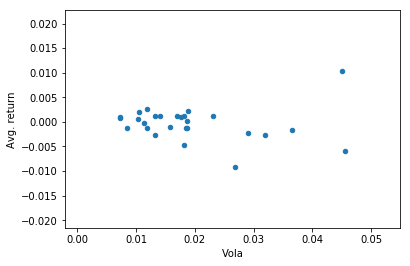

In [290]:
### plotting the data

import matplotlib.pyplot as plt

df_mean_var_output.T.plot.scatter(x=1,y=0)

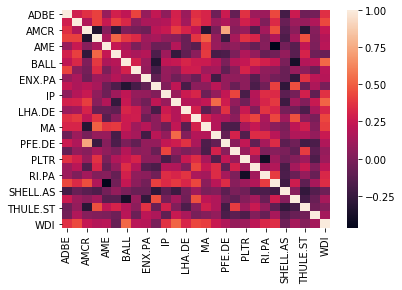

In [293]:
import seaborn as sns
df_plot = df_log_returns.corr()
sns.heatmap(df_plot)

df_plot.to_excel('hm.xlsx')